# Mask R-CNN - Train FCN using MRCNN in Predict Mode 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys,os, pprint
pp = pprint.PrettyPrinter(indent=2, width=100)
print('Current working dir: ', os.getcwd())
if '..' not in sys.path:
    print("appending '..' to sys.path")
    sys.path.append('..')
    
import numpy as np
import mrcnn.utils     as utils
import mrcnn.visualize as visualize
from mrcnn.prep_notebook import build_fcn_training_pipeline, run_fcn_training_pipeline
from mrcnn.visualize     import display_training_batch
# from mrcnn.prep_notebook import get_inference_batch, get_image_batch

input_parms = " --epochs         2   --steps_in_epoch 32  --last_epoch 0 "
input_parms +=" --batch_size     1   --lr 0.00001         --val_steps 8 " 
input_parms +=" --mrcnn_logs_dir train_mrcnn_coco "
input_parms +=" --fcn_logs_dir   train_fcn8_bce   "
input_parms +=" --scale_factor   4"
input_parms +=" --mrcnn_model    last "
input_parms +=" --fcn_model      init "
input_parms +=" --opt            adam "
input_parms +=" --fcn_arch       fcn8 " 
input_parms +=" --fcn_layers     all " 
input_parms +=" --sysout         screen "
## input_parms +=" --coco_classes   62 63 67 78 79 80 81 82 72 73 74 75 76 77"
input_parms +=" --coco_classes   78 79 80 81 82 44 46 47 48 49 50 51 34 35 36 37 38 39 40 41 42 43 10 11 13 14 15 "
input_parms +=" --new_log_folder    "
parser = utils.command_line_parser()
args = parser.parse_args(input_parms.split())
utils.display_input_parms(args)

Current working dir:  E:\git_projs\MRCNN3\notebooks
appending '..' to sys.path


Using TensorFlow backend.



Arguments passed :
--------------------
batch_size                     1
coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
epochs                         2
fcn_arch                       FCN8
fcn_layers                     ['all']
fcn_logs_dir                   train_fcn8_bce
fcn_losses                     fcn_BCE_loss
fcn_model                      init
last_epoch                     0
lr                             0.00001
mrcnn_exclude_layers           None
mrcnn_layers                   mrcnn fpn rpn 
mrcnn_logs_dir                 train_mrcnn_coco
mrcnn_model                    last
new_log_folder                 True
opt                            ADAM
scale_factor                   4
steps_in_epoch                 32
sysout                         SCREEN
val_steps                      8




In [2]:
# mrcnn_model, fcn_model = build_traininf_pipeline(fcn_weight_file = WEIGHT_FILE, batch_size = 2)
mrcnn_model, fcn_model = build_fcn_training_pipeline(args = args)


--> Execution started at: 12-21-2018 @ 14:44:44
    Tensorflow Version: 1.8.0   Keras Version : 2.2.0 

Arguments passed :
--------------------
batch_size                     1
coco_classes                   [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
epochs                         2
fcn_arch                       FCN8
fcn_layers                     ['all']
fcn_logs_dir                   train_fcn8_bce
fcn_losses                     fcn_BCE_loss
fcn_model                      init
last_epoch                     0
lr                             0.00001
mrcnn_exclude_layers           None
mrcnn_layers                   mrcnn fpn rpn 
mrcnn_logs_dir                 train_mrcnn_coco
mrcnn_model                    last
new_log_folder                 True
opt                            ADAM
scale_factor                   4
steps_in_epoch                 32
sysout                         SCREEN
val_steps                      8


    hm_indices                     :  shape: (?, 2)                KB.shape:(None, 2)             Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 81, 256, 256)     KB.shape:(None, 81, 256, 256)  Keras Tensor: False
    pt2_heatmaps                   :  shape: (?, 256, 256)         KB.shape:(None, 256, 256)      Keras Tensor: False
    old_style_scores               :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1                   :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False
    alt_scores_1_scattered         :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_1_norm(by_class)    :  shape: (1, 81, 200, 3)       KB.shape:(1, 81, 200, 3)       Keras Tensor: False
    alt_scores_1_norm(by_image)    :  shape: (?, 3)                KB.shape:(None, 3)             Keras Tensor: False

    Normalize heatmap within each class !--------------

 index:  0    input name : input_image:0                              Type: float32           Shape: (?, 1024, 1024, 3)
 index:  1    input name : input_image_meta:0                         Type: float32           Shape: (?, ?)
 index:  2    input name : input_rpn_match:0                          Type: int32             Shape: (?, ?, 1)
 index:  3    input name : input_rpn_bbox:0                           Type: float32           Shape: (?, ?, 4)
 index:  4    input name : input_gt_class_ids:0                       Type: int32             Shape: (?, ?)
 index:  5    input name : input_gt_boxes:0                           Type: float32           Shape: (?, ?, 4)
 Outputs:
 --------
 layer:  0    output name: cntxt_layer/pred_heatmap:0                 Type: float32           Shape: (1, 256, 256, 81)
 layer:  1    output name: cntxt_layer/pred_heatmap_scores:0          Type: float32           Shape: (1, 81, 200, 23)
 layer:  2    output name: cntxt_layer_gt/gt_heatmap:0                Type

## Defined training datasets

In [3]:
##------------------------------------------------------------------------------------
## Build & Load Training and Validation datasets
##------------------------------------------------------------------------------------
from mrcnn.coco import prep_coco_dataset
# chair/cound/dining tbl/ electronics/ appliances -- train: 34562  val: 1489
# furn_elect_appl = [62, 63, 67, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]  
## appliances / kitchen / sports                  -- train: 46891  val: 1954
# appl_ktch_sports = [78, 79, 80, 81, 82,44, 46, 47, 48, 49, 50, 51,34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

print('ARG: load coco classes: ', args.coco_classes)
load_class_ids = args.coco_classes
# load_class_ids = args.coco_classes
print('load coco classes: ', load_class_ids)

dataset_train = prep_coco_dataset(["train", "val35k"], mrcnn_model.config, generator = False , shuffle = False, load_coco_classes=load_class_ids)
dataset_val   = prep_coco_dataset(["minival"]        , mrcnn_model.config, generator = False , shuffle = False, load_coco_classes=load_class_ids)

print(len(dataset_train.image_ids), len(dataset_train.image_info))
print(len(dataset_val.image_ids), len(dataset_val.image_info))

ARG: load coco classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
load coco classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instances_train2014.json  into memory...
Done (t=18.94s)
creating index...
index created!
 load subset of classes:  [78, 79, 80, 81, 82, 44, 46, 47, 48, 49, 50, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 10, 11, 13, 14, 15]
 image dir            :  F:\MLDatasets\coco2014\train2014
 json_path_dir        :  F:\MLDatasets\coco2014\annotations/instances_train2014.json
 number of images     :  40400
 image_ids[:10]       :  [262146, 524291, 9, 393227, 393230, 131087, 393241, 393242, 131099, 393251]
 image_ids[1000:1010] :  [396150, 265080, 396157, 2951, 396172, 134032, 134033, 527250, 2963, 2964]
COCO loading annotations file F:\MLDatasets\coco2014\annotations/instanc

####  Display active classes of `dataset`

In [22]:
# dataset_train.display_active_classes()
# dataset_val.display_active_classes()
len(dataset_train.image_ids)
# len(dataset_val.image_ids)
# a = dataset_train.image_ids.tolist()
print(len(a))
ext_ids = [img_inf['id'] for img_inf in dataset_train.image_info]
print(len(ext_ids))

ext_ids.index(1900)

57457
57457


646

###  Print model layer and weight information

In [ ]:
for layer in fcn_model.keras_model.layers:
    print('layer: ', layer.name)
    for weight in layer.weights:
        print('   mapped_weight_name : ',weight.name)
    if hasattr(layer, 'output'):
        print('   layer output ', type(layer),' shape: ',layer.output.shape )

In [ ]:
fcn_model.keras_model.metrics_names

In [ ]:
model.keras_model.losses
print(model.keras_model.metrics_names)

In [ ]:
# model.keras_model.summary(line_length=132, positions=[0.30,0.75, .83, 1. ])

### Display Images from `batch_x`

In [ ]:
# train_batch_x, train_batch_y = next(train_generator)
# display_training_batch(dataset_train, train_batch_x)
# for i in train_batch_x:
#     print(type(i), i.shape)

### Load a specific image using image_id

image id :  30741
 Image_id    :  30741  Reference:  http://cocodataset.org/#explore?id=358189 Coco Id: 358189
 Image meta  :  [30741   360   640     3   224     0   800  1024]
 Class ids   :  (4,)    [ 6  1  1 10]
 Class Names :  ['bus', 'person', 'person', 'traffic light']


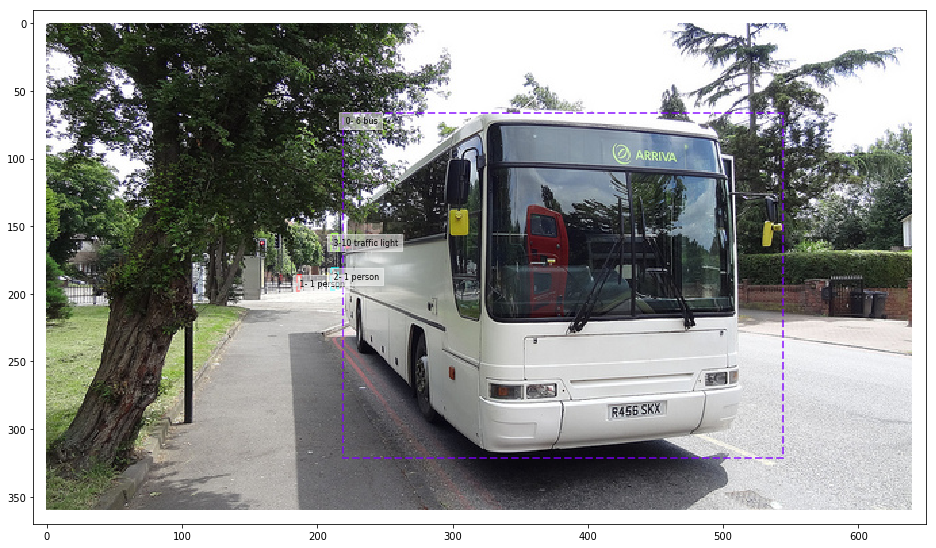

In [34]:
### Image ids that cause failure in trainfcn mode. 
### 4598: 275557, 646: 1900, 26058:341061,25982: 471900, 18631:577876, 48015: 243914, 38621:124593, 21579:325236, 758:526514
### 28599: 481365, 30741:358189
train_batch_x, _ =  data_gen_simulate(dataset_train, mrcnn_model.config, [30741])
visualize.display_training_batch(dataset_train, train_batch_x)


## Call `train_in_batches()`

In [ ]:
mrcnn_model.config.display()
fcn_model.config.display()

In [6]:
##----------------------------------------------------------------------------------------------
## Train the FCN only 
## Passing layers="heads" freezes all layers except the head
## layers. You can also pass a regular expression to select
## which layers to train by name pattern.
##----------------------------------------------------------------------------------------------            
train_layers = ['all']   # args.fcn_layers
# loss_names   = ['fcn_MSE_loss']
loss_names   = ['fcn_BCE_loss']
fcn_model.epoch = fcn_model.config.LAST_EPOCH_RAN

fcn_model.train_in_batches(
            mrcnn_model,    
            dataset_train,
            dataset_val, 
            layers = train_layers,
            losses = loss_names,
            # learning_rate   = fcn_config.LEARNING_RATE,  
            # epochs          = 25,                             # total number of epochs to run (accross multiple trainings)
            # epochs_to_run   = fcn_config.EPOCHS_TO_RUN,
            # batch_size      = fcn_config.BATCH_SIZE,          # gets value from self.config.BATCH_SIZE
            # steps_per_epoch = fcn_config.STEPS_PER_EPOCH ,    # gets value form self.config.STEPS_PER_EPOCH
            # min_LR          = fcn_config.MIN_LR
            )


['all']
['.*']
layers regex : .*

Selecting layers to train
-------------------------
Layer    Layer Name               Layer Type
   0  input_pr_hm_norm       (InputLayer          )   ............................no weights to train ]
   1  block1_conv1           (Conv2D              )   TRAIN 
   2  block1_conv2           (Conv2D              )   TRAIN 
   3  block1_pool            (MaxPooling2D        )   ............................no weights to train ]
   4  block2_conv1           (Conv2D              )   TRAIN 
   5  block2_conv2           (Conv2D              )   TRAIN 
   6  block2_pool            (MaxPooling2D        )   ............................no weights to train ]
   7  block3_conv1           (Conv2D              )   TRAIN 
   8  block3_conv2           (Conv2D              )   TRAIN 
   9  block3_conv3           (Conv2D              )   TRAIN 
  10  block3_pool            (MaxPooling2D        )   ............................no weights to train ]
  11  block4_conv1        

D:\Program Files\Anaconda3\envs\TF\lib\site-packages\scipy\ndimage\interpolation.py:583: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


22/32 [===================>..........] - ETA: 10:43 - loss: 0.0344 - fcn_BCE_loss: 0.0344

KeyboardInterrupt: 